<a href="https://colab.research.google.com/github/reginaxy/Hotel_Analysis/blob/main/Sentiment_Analysis_(CV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries, Packages, and Data**

**Import Libraries & Packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

seed = 4353

**Mount to GDrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Data**

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Hotel_Datasets/515k_Hotel_Reviews_SENTIMENTS_40tokens.csv'
df = pd.read_csv(path)
df

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review,cleaned_Reviews
0,2017-07-24,Netherlands,Hotel Arena,Negative,Poland,Backyard of the hotel is total mess shouldn t...,backyard hotel total mess happen hotel star
1,2017-07-17,Netherlands,Hotel Arena,Negative,United Kingdom,Cleaner did not change our sheet and duvet ev...,cleaner change sheet duvet everyday made bed a...
2,2017-07-17,Netherlands,Hotel Arena,Negative,United Kingdom,Apart from the price for the brekfast Everyth...,apart price brekfast good
3,2017-09-07,Netherlands,Hotel Arena,Negative,Belgium,Even though the pictures show very clean room...,even though picture show clean room actual roo...
4,2017-08-07,Netherlands,Hotel Arena,Negative,Norway,The aircondition makes so much noise and its ...,aircondition make noise hard sleep night
...,...,...,...,...,...,...,...
545176,2015-07-09,Austria,Atlantis Hotel Vienna,Positive,Germany,Good breakfast,good breakfast
545177,2015-06-09,Austria,Atlantis Hotel Vienna,Positive,Kuwait,helpful staff allowed me to check in early as...,helpful staff allowed check early arrived chec...
545178,2015-08-22,Austria,Atlantis Hotel Vienna,Positive,Estonia,Breakfast was ok and we got earlier check in,breakfast ok got earlier check
545179,2015-08-17,Austria,Atlantis Hotel Vienna,Positive,Mexico,The rooms are enormous and really comfortable...,room enormous comfortable believe family membe...


**Overview of Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545181 entries, 0 to 545180
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Review_Date           545181 non-null  object
 1   Hotel_Country         545181 non-null  object
 2   Hotel_Name            545181 non-null  object
 3   Sentiments            545181 non-null  object
 4   Reviewer_Nationality  545181 non-null  object
 5   Review                545181 non-null  object
 6   cleaned_Reviews       545181 non-null  object
dtypes: object(7)
memory usage: 29.1+ MB


**Barchart of Sentiments Distribution**

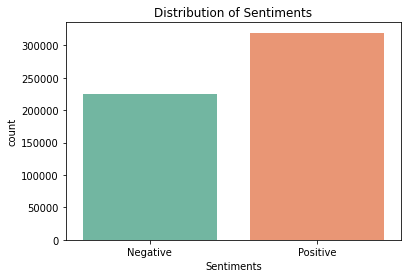

In [ ]:
ax = sns.countplot(x="Sentiments", data=df_new, palette = 'Set2')
plt.title('Distribution of Sentiments')
sns.set(rc = {'figure.figsize':(15,8)})

### **Data Selection & Preparation**

**Defining predictor & Target variable**

In [ ]:
# Defining predictor & Target variable

X = df_new['cleaned_Reviews'] # predictor variable
y = df_new['Sentiments'] # target variable

**Split dataset into training and testing sets**

Training set - 70%

Testing set - 30%


In [ ]:
# Split dataset into training and testing sets
# Training set - 70%
# Testing set - 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= seed)

**Display data shape**

In [ ]:
# Display data shape

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(381626,) (381626,)
(163555,) (163555,)


**Percentage of Positive & Negative Review counts in Training set**

In [ ]:
# Percentage of Positive & Negative Review counts

y_train.value_counts(normalize=True)

Positive    0.58664
Negative    0.41336
Name: Sentiments, dtype: float64

### **Model 1: Multinomial Naive Bayes (MNB)**

**Fitting Multinomial Naive Bayes (MNB) classifer into Pipeline**

In [ ]:
# Fitting Multinomial Naive Bayes (MNB) classifer into Pipeline
# Countvectorizer 

MNB = Pipeline([('Vect',CountVectorizer()),
                  ('model',MultinomialNB())])

**Train MNB classifier**

In [ ]:
# Train MNB classifier

MNB.fit(X_train, y_train)

Pipeline(steps=[('Vect', CountVectorizer()), ('model', MultinomialNB())])

**Calculate Accuracy**

In [ ]:
# Calculate Accuracy

print ("Accuracy:", MNB.score(X_test, y_test))

Accuracy: 0.920778942863257


**Construct the classification report , accuracy & F1 score**

In [ ]:
# Construct the classification report , accuracy & F1 score

predictions = MNB.predict(X_test)

print(classification_report(y_test, predictions))

MNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90     67789
    Positive       0.93      0.94      0.93     95766

    accuracy                           0.92    163555
   macro avg       0.92      0.92      0.92    163555
weighted avg       0.92      0.92      0.92    163555

Accuracy :  92.08  %
f1_score :  0.921


**Construct the Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


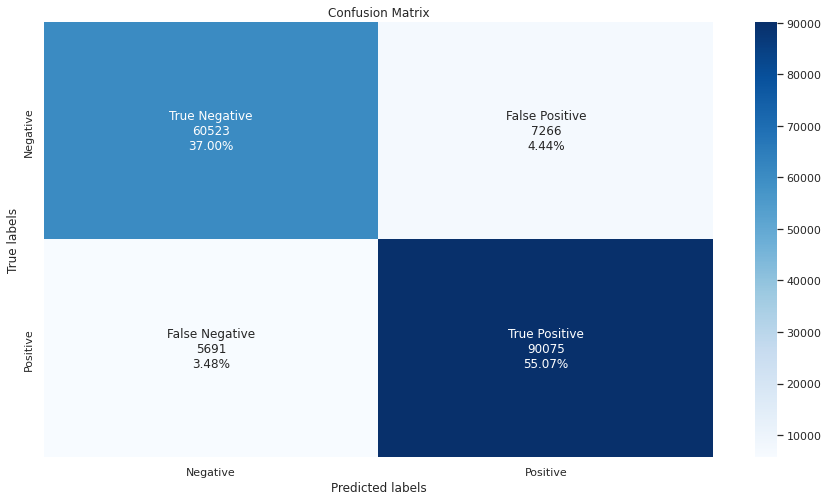

In [ ]:
# Construct the Confusion Matrix

predictions = MNB.predict(X_test)
cm = confusion_matrix(y_test, predictions)

names = ['True Negative','False Positive','False Negative','True Positive']

counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]

percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names, counts, percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

**Testing out the model built**

fitting in some random reviews to predict their sentiments

In [ ]:
# Testing out the model built
# fitting in some random reviews to predict their sentiments

MNB.predict(['the service is fantastic', 'the staff was unfriendly', 'slow service', 'beautiful scenery', 'my hotel room was very clean', 'rude manager'])

array(['Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative'], dtype='<U8')

### **Model 2: Logistic Regression**

**Fitting Logistic Regression (LR) classifer into Pipeline**

In [ ]:
# Fitting Logistic Regression (LR) classifer into Pipeline
# Countvectorizer 

lr = Pipeline([('Vect',CountVectorizer()),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

Pipeline(steps=[('Vect', CountVectorizer()),
                ('model', LogisticRegression(max_iter=1000))])

**Calculate Accuracy**

In [ ]:
# Calculate Accuracy

print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.9312952829323469


**Construct the classification report , accuracy & F1 score**

In [ ]:
# Construct the classification report , accuracy & F1 score

predictions = lr.predict(X_test)

print(classification_report(y_test, predictions))

lr_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
lr_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , lr_accuracy , " %")
print("f1_score : " , lr_f1)

              precision    recall  f1-score   support

    Negative       0.92      0.92      0.92     67789
    Positive       0.94      0.94      0.94     95766

    accuracy                           0.93    163555
   macro avg       0.93      0.93      0.93    163555
weighted avg       0.93      0.93      0.93    163555

Accuracy :  93.13  %
f1_score :  0.931


**Construct the Confusion Matrix**

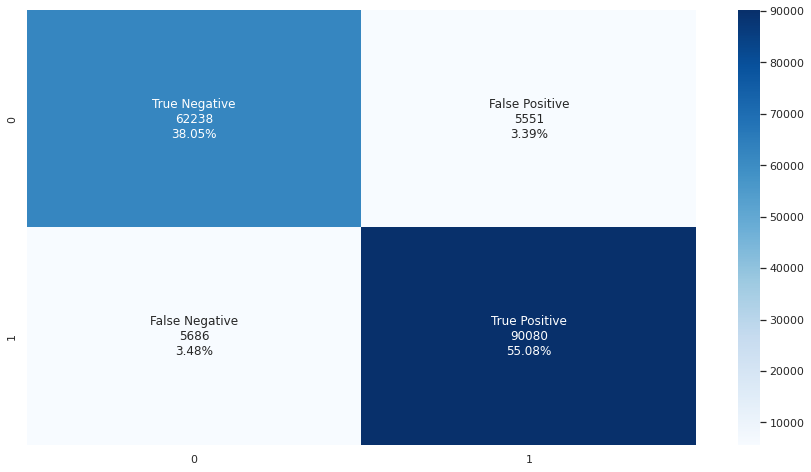

In [ ]:
# Construct the Confusion Matrix

predictions = lr.predict(X_test)
cm = confusion_matrix(y_test, predictions)

names = ['True Negative','False Positive','False Negative','True Positive']

counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]

percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names, counts, percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

**Testing out the model built**

fitting in some random reviews to predict their sentiments

In [ ]:
# Testing out the model built
# fitting in some random reviews to predict their sentiments

lr.predict(['the service is fantastic', 'the staff was unfriendly', 'slow service', 'beautiful scenery', 'the scenery was gorgeous', 'the manager was very rude'])

array(['Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative'], dtype=object)

### **Model 3: Random Forest**

**Fitting Random Forest (RFC) classifer into Pipeline**

In [ ]:
# Fitting Random Forest (RFC) classifer into Pipeline
# Countvectorizer 

rfc = Pipeline([('Vect',CountVectorizer()),
                  ('model',RandomForestClassifier(n_estimators= 10, random_state= seed))])

rfc.fit(X_train, y_train)

Pipeline(steps=[('Vect', CountVectorizer()),
                ('model',
                 RandomForestClassifier(n_estimators=10, random_state=4353))])

**Calculate Accuracy**

In [ ]:
# Calculate Accuracy

print ("Accuracy:", rfc.score(X_test, y_test))

Accuracy: 0.9176546115985448


**Construct the classification report , accuracy & F1 score**

In [ ]:
# Construct the classification report , accuracy & F1 score

predictions = rfc.predict(X_test)

print(classification_report(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    Negative       0.90      0.90      0.90     67789
    Positive       0.93      0.93      0.93     95766

    accuracy                           0.92    163555
   macro avg       0.91      0.92      0.92    163555
weighted avg       0.92      0.92      0.92    163555

Accuracy :  91.77  %
f1_score :  0.918


**Construct the Confusion Matrix**

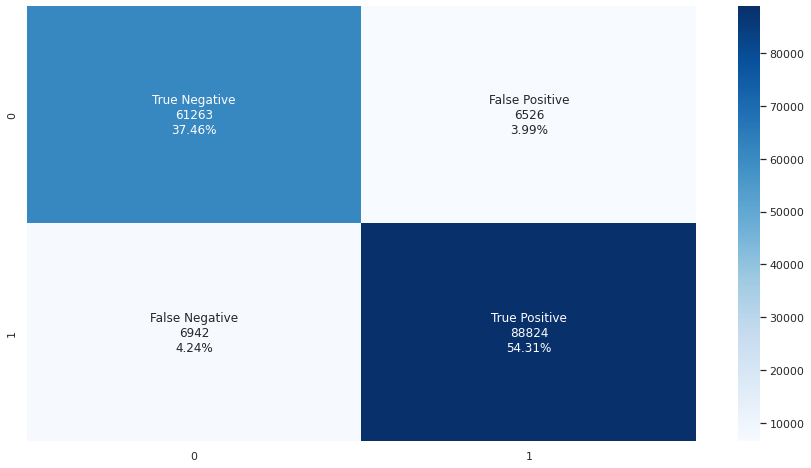

In [ ]:
# Construct the Confusion Matrix

predictions = rfc.predict(X_test)
cm = confusion_matrix(y_test, predictions)

names = ['True Negative','False Positive','False Negative','True Positive']

counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]

percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names, counts, percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

**Testing out the model built**

Fitting in some random reviews to predict their sentiments


In [ ]:
# Testing out the model built
# Fitting in some random reviews to predict their sentiments

rfc.predict(['the service is fantastic', 'the staff was unfriendly', 'slow service', 'beautiful scenery', 'the scenery was gorgeous', 'the manager was very rude'])

array(['Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative'], dtype=object)

### **Model 4: Decision Tree**

**Fitting Decision Tree (DCT) classifer into Pipeline**

In [ ]:
# Fitting Decision Tree (DCT) classifer into Pipeline
# Countvectorizer 

dct = Pipeline([('Vect',CountVectorizer()),
                  ('model',DecisionTreeClassifier(criterion='entropy', random_state=seed))])

dct.fit(X_train,y_train)

Pipeline(steps=[('Vect', CountVectorizer()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy',
                                        random_state=4353))])

**Calculate Accuracy**

In [ ]:
# Calculate Accuracy

print ("Accuracy:", dct.score(X_test, y_test))

Accuracy: 0.887469047109535


**Construct the classification report , accuracy & F1 score**

In [ ]:
# Construct the classification report , accuracy & F1 score

predictions = dct.predict(X_test)

print(classification_report(y_test, predictions))

dct_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
dct_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , dct_accuracy , " %")
print("f1_score : " , dct_f1)

              precision    recall  f1-score   support

    Negative       0.87      0.86      0.86     67789
    Positive       0.90      0.91      0.90     95766

    accuracy                           0.89    163555
   macro avg       0.88      0.88      0.88    163555
weighted avg       0.89      0.89      0.89    163555

Accuracy :  88.75  %
f1_score :  0.887


**Construct the Confusion Matrix**

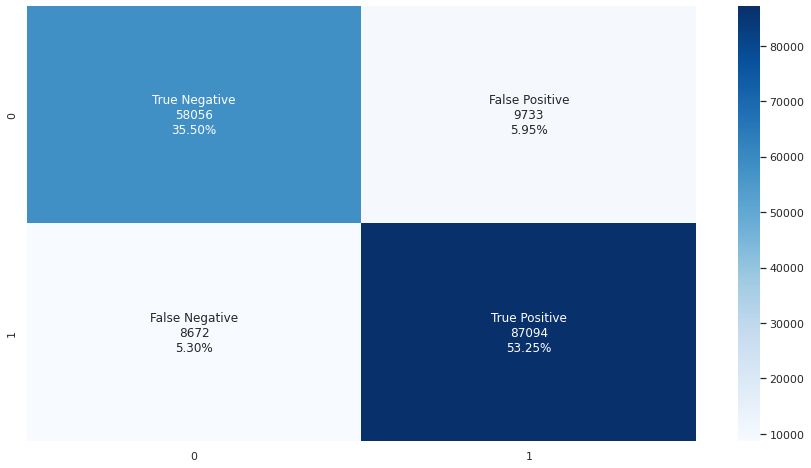

In [ ]:
# Construct the Confusion Matrix

predictions = dct.predict(X_test)
cm = confusion_matrix(y_test, predictions)

names = ['True Negative','False Positive','False Negative','True Positive']

counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]

percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names, counts, percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

**Testing out the model built** 

fitting in some random reviews to predict their sentiments

In [ ]:
# Testing out the model built 
# fitting in some random reviews to predict their sentiments

dct.predict(['the service is fantastic', 'the staff was unfriendly', 'slow service', 'beautiful scenery', 'the scenery was gorgeous', 'the manager was very rude'])

array(['Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative'], dtype=object)